<a href="https://www.kaggle.com/code/rezwananik/south-asian-economic-social-trends-analysis?scriptVersionId=254155364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# South Asia Economic & Social Trends Notebook
**Purpose:**
This notebook provides an in-depth analysis of key socio-economic, governance, and environmental indicators across South Asian countries from 2000 to 2023. The objective is to explore trends in economic growth, compare social progress, assess the impact of governance and stability metrics, and analyze economic shifts pre- and post-COVID-19. By examining these indicators, the analysis aims to offer insights into each country’s developmental trajectory, highlight regional similarities and differences, and identify potential areas for policy and development focus.

Kaggle Dataset Name: South Asian Growth & Development Data (2000-23)

South Asian Countries: 
* Bangladesh, Bhutan, India, Pakistan, Nepal, Sri Lanka, Afghanistan and Maldives.

Important indicators:
* GDP (current USD)
* GDP growth (annual %)
* GDP per capita (current USD)
* Unemployment, total (% of total labor force) (modeled ILO estimate)
* Inflation, consumer prices (annual %)
* Foreign direct investment, net inflows (% of GDP)
* Trade (% of GDP)
* Gini index
* Population, total
* Population growth (annual %)
* Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
* Life expectancy at birth, total (years)
* Mortality rate, infant (per 1,000 live births)
* Literacy rate, adult total (% of people ages 15 and above)
* School enrollment, primary (% gross)
* Urban population (% of total population)
* Access to electricity (% of population)
* People using at least basic drinking water services (% of population)
* People using at least basic sanitation services (% of population)
* Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)
* PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
* Renewable energy consumption (% of total final energy consumption)
* Forest area (% of land area)
* Control of Corruption: Percentile Rank
* Political Stability and Absence of Violence/Terrorism: Estimate
* Regulatory Quality: Estimate
* Rule of Law: Estimate
* Voice and Accountability: Estimate
* Individuals using the Internet (% of population)
* Research and development expenditure (% of GDP)
* High-technology exports (% of manufactured exports)


# 1. Get the data and clean

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/kaggle/input/south-asia-growth-and-development-data-2000-23/South_Asian_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

In [2]:
data.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,..,..,..
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,..,..,..,..,..,0.00472257,..,..
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,..,..
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,..,..
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,..,..


In [3]:
data.replace("..", np.nan, inplace=True)
# Converting columns to numeric and handling exceptions
for column in data.columns:
    try:
        data[column] = pd.to_numeric(data[column])
    except ValueError:
        pass 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

In [4]:
# Dropping columns because too many null values in them
data = data.drop(['Research and development expenditure (% of GDP)', 'High-technology exports (% of manufactured exports)'], axis=1)
data.head()


,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,0.054813,64.767280,45.0,1.852782,4.787234,-2.438969,-2.080253,-1.780661,-2.031417,NaN
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,0.050196,64.597573,45.6,1.852782,NaN,NaN,NaN,NaN,NaN,0.004723
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,0.046328,64.416888,37.8,1.852782,4.761905,-2.035034,-1.811546,-1.673473,-1.433421,0.004561
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,0.046756,64.176231,36.7,1.852782,4.761905,-2.198372,-1.463108,-1.558294,-1.177571,0.087891
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,0.039875,63.826609,44.2,1.852782,6.403941,-2.295682,-1.511549,-1.693925,-1.203034,0.105809


 # 2. Import necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 3. Economic Growth comparison between countries

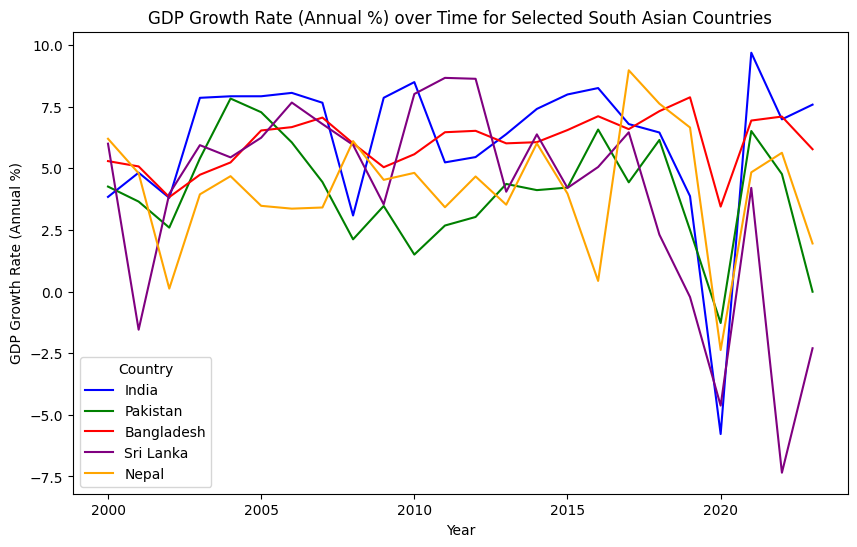

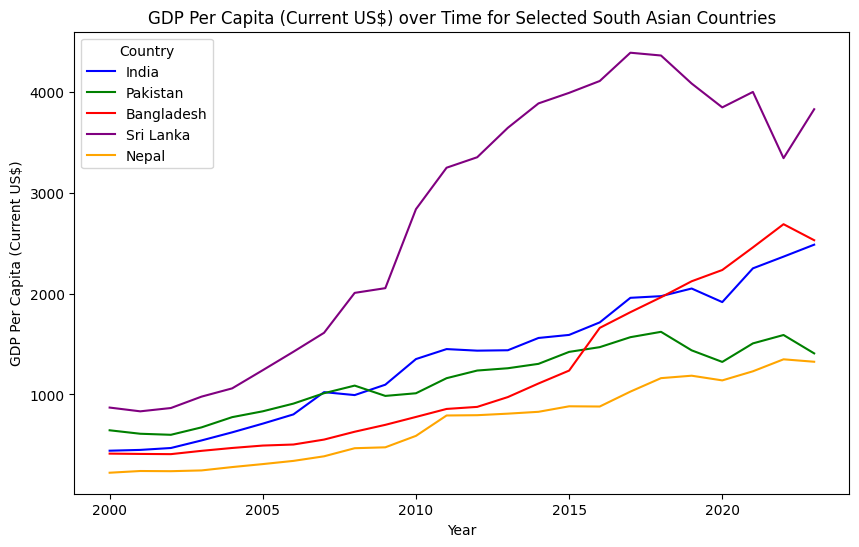

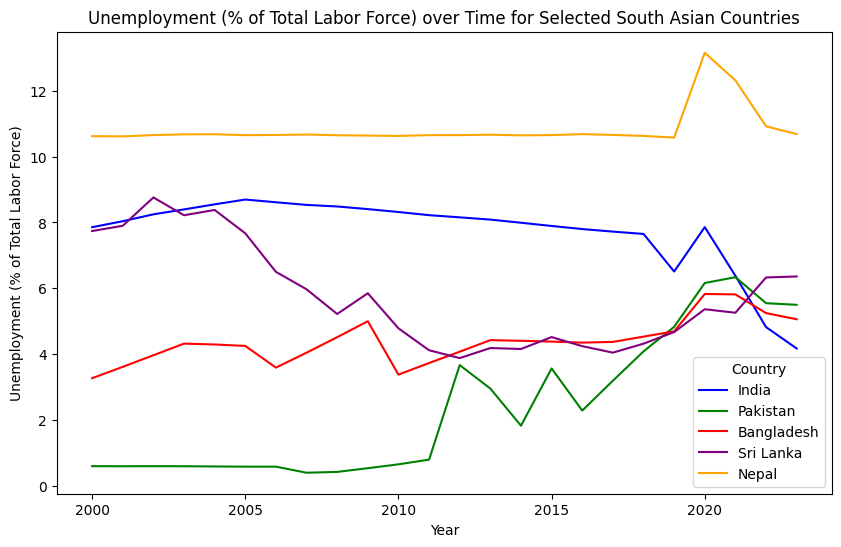

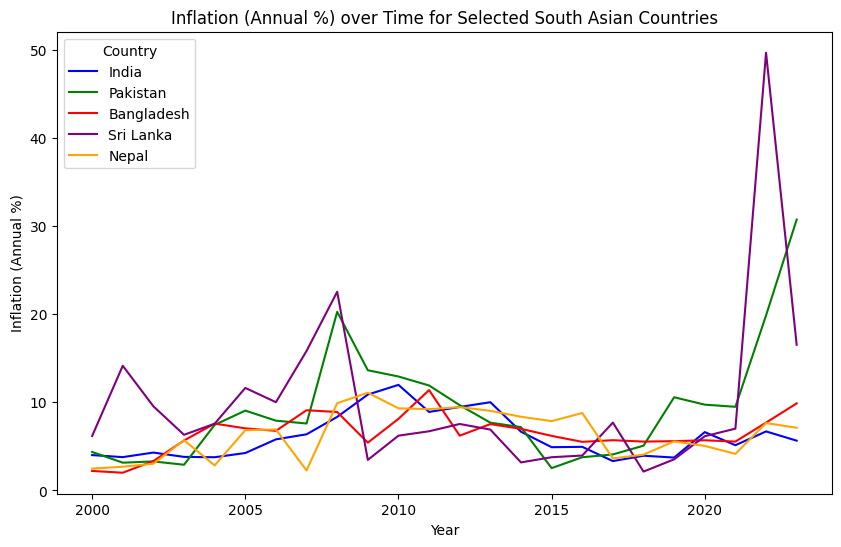

In [6]:
# Analysis 1: Economic Growth Analysis
# Selecting relevant columns

country_colors = {
    "India": "blue",
    "Pakistan": "green",
    "Bangladesh": "red",
    "Sri Lanka": "purple",
    "Nepal": "orange"
}

economic_growth_cols = ['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita (current US$)',
                      'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                      'Inflation, consumer prices (annual %)']
economic_growth_data = data[economic_growth_cols]

# selected countries
selected_countries = ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal"]
economic_growth_filtered = economic_growth_data[economic_growth_data["Country"].isin(selected_countries)]





def plot_indicator(indicator_name, y_label):
    plt.figure(figsize=(10, 6))
    for country in selected_countries:
        country_data = economic_growth_filtered[economic_growth_filtered["Country"] == country]
        plt.plot(country_data["Year"], country_data[indicator_name], label=country, color=country_colors[country])
    plt.title(f"{y_label} over Time for Selected South Asian Countries")
    plt.xlabel("Year")
    plt.ylabel(y_label)
    plt.legend(title="Country")
    plt.show()




plot_indicator("GDP growth (annual %)", "GDP Growth Rate (Annual %)")
plot_indicator("GDP per capita (current US$)", "GDP Per Capita (Current US$)")
plot_indicator("Unemployment, total (% of total labor force) (modeled ILO estimate)", "Unemployment (% of Total Labor Force)")
plot_indicator("Inflation, consumer prices (annual %)", "Inflation (Annual %)")


# 4. Social Growth comparison between countries

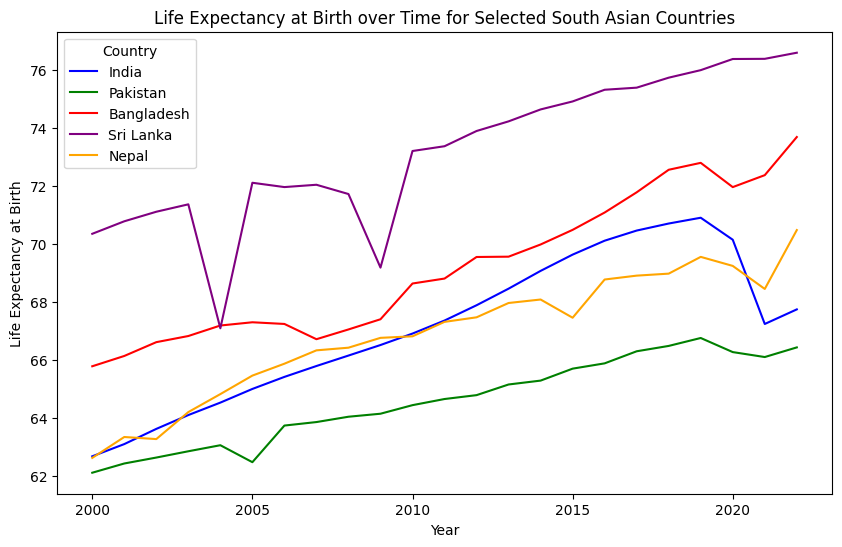

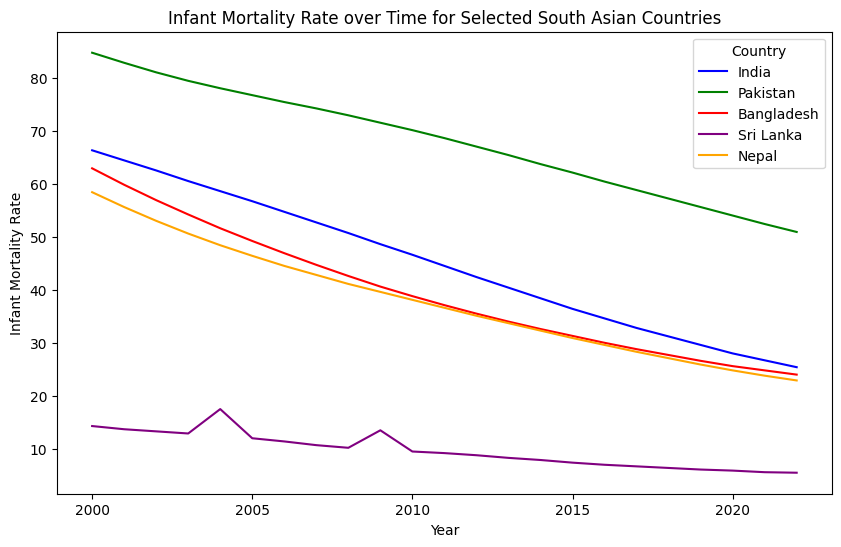

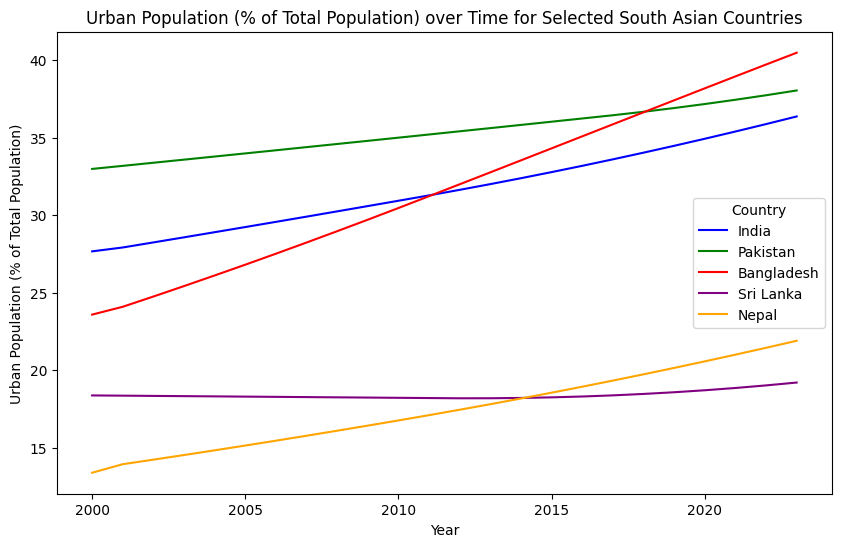

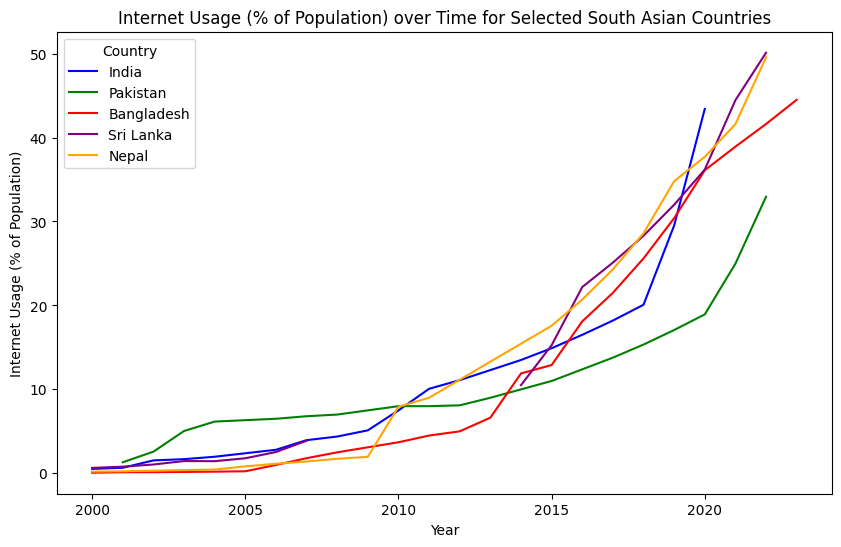

In [7]:
# Analysis 2: Social Indicators growth

country_colors = {
    "India": "blue",
    "Pakistan": "green",
    "Bangladesh": "red",
    "Sri Lanka": "purple",
    "Nepal": "orange"
}

social_cols = ['Country', 'Year', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', "Life expectancy at birth, total (years)", "Mortality rate, infant (per 1,000 live births)", 
                        'Urban population (% of total population)', 
                        'Individuals using the Internet (% of population)']
social_gtowth_data = data[social_cols]


selected_countries = ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal"]
social_growth_filtered = social_gtowth_data[social_gtowth_data["Country"].isin(selected_countries)]



def plot_indicator(indicator_name, y_label):
    plt.figure(figsize=(10, 6))
    for country in selected_countries:
        country_data = social_growth_filtered[social_growth_filtered["Country"] == country]
        plt.plot(country_data["Year"], country_data[indicator_name], label=country, color=country_colors[country])
    plt.title(f"{y_label} over Time for Selected South Asian Countries")
    plt.xlabel("Year")
    plt.ylabel(y_label)
    plt.legend(title="Country")
    plt.show()


plot_indicator("Life expectancy at birth, total (years)", "Life Expectancy at Birth")
plot_indicator("Mortality rate, infant (per 1,000 live births)", "Infant Mortality Rate")
plot_indicator("Urban population (% of total population)", "Urban Population (% of Total Population)")
plot_indicator("Individuals using the Internet (% of population)", "Internet Usage (% of Population)")


# 5. Correlation between Governance Metrics

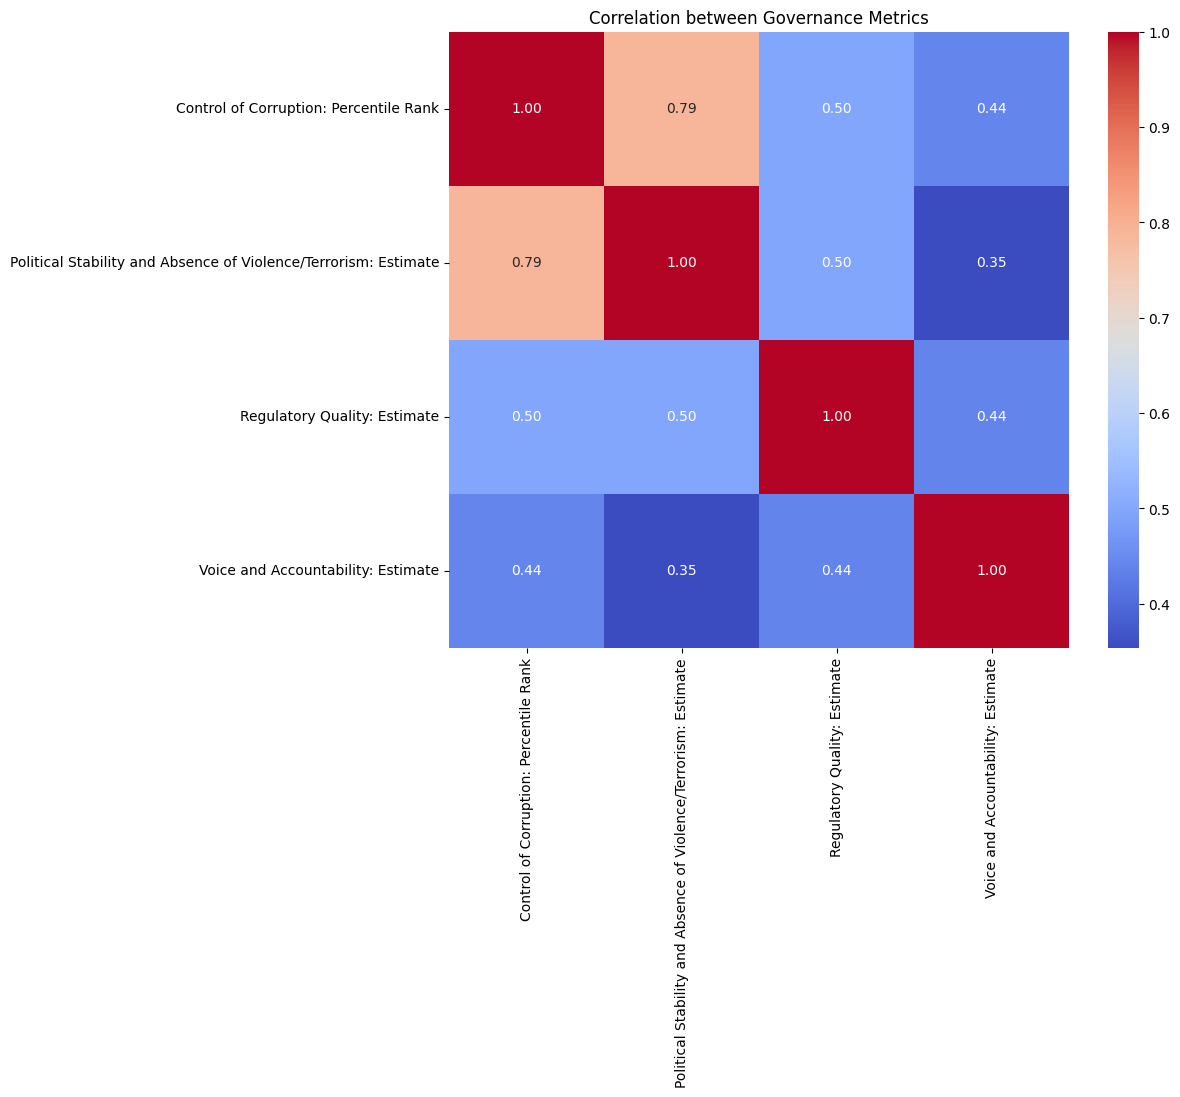

In [8]:
# Analysis 3: Governance and Stability Metrics Analysis
#Relevant columns
governance_cols = ['Country', 'Year', 'Control of Corruption: Percentile Rank',
                   'Political Stability and Absence of Violence/Terrorism: Estimate',
                   'Regulatory Quality: Estimate', 'Voice and Accountability: Estimate']
governance_data = data[governance_cols].dropna()


governance_corr = governance_data[
    ['Control of Corruption: Percentile Rank', 
     'Political Stability and Absence of Violence/Terrorism: Estimate', 
     'Regulatory Quality: Estimate', 
     'Voice and Accountability: Estimate' 
     ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(governance_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Governance Metrics")
plt.show()

# 6. pre- and post-COVID-19 economic comparison

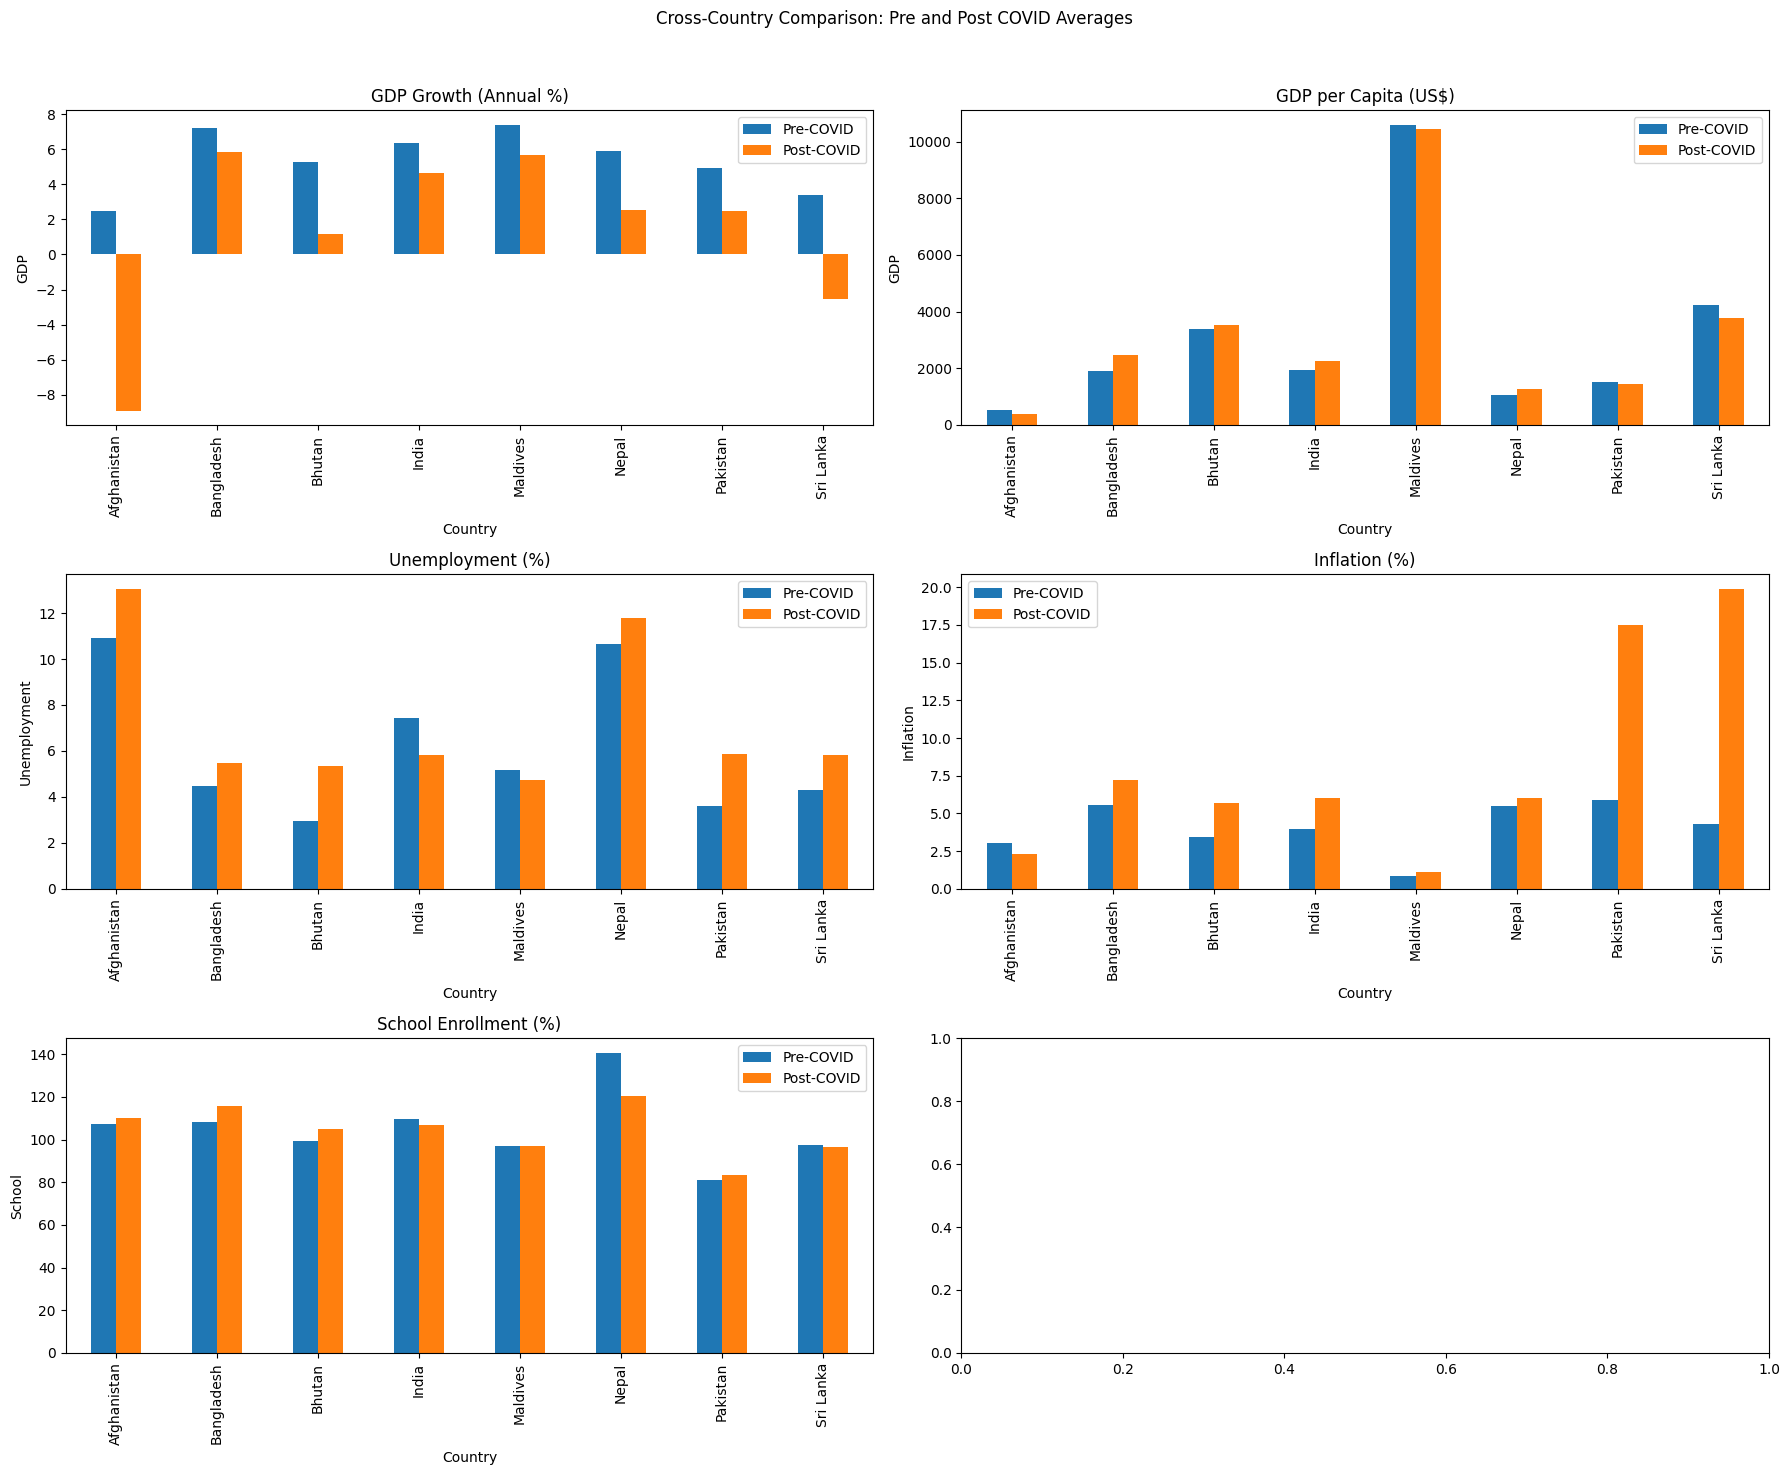

In [9]:
pd.options.mode.copy_on_write = True 
# Analysis 4: Pre and post covid comparative economic analysis
# Filtering relevant columns for analysis
data_filtered = data[['Country', 'Year', 'GDP growth (annual %)', 'GDP per capita (current US$)',
                      'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                      'Inflation, consumer prices (annual %)', 'School enrollment, primary (% gross)']]

# Filling NaN values by forward filling within each country (best for maintaining trend continuity)
data_filtered.sort_values(by=['Country', 'Year'], inplace=True)
data_filtered.ffill(inplace=True)  # Forward filling
data_filtered.bfill(inplace=True) # Backward filling

# Splitting data into pre-COVID (2016-2019) and post-COVID (2020-2023)
pre_covid_data = data_filtered[(data_filtered['Year'] >= 2016) & (data_filtered['Year'] < 2020)]
post_covid_data = data_filtered[data_filtered['Year'] >= 2020]


# For Cross-Country Comparison: Pre and Post COVID Average values
# Calculating average for each indicator in pre and post COVID periods

# Aggregate means by country for each period
pre_covid_avg = pre_covid_data.groupby('Country').mean().reset_index()
post_covid_avg = post_covid_data.groupby('Country').mean().reset_index()

# Merging the pre and post-COVID averages
comparison_df = pd.merge(pre_covid_avg, post_covid_avg, on='Country', suffixes=('_pre_covid', '_post_covid'))

fig, axs = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Cross-Country Comparison: Pre and Post COVID Averages")

indicators = [
    ('GDP growth (annual %)_pre_covid', 'GDP growth (annual %)_post_covid', 'GDP Growth (Annual %)'),
    ('GDP per capita (current US$)_pre_covid', 'GDP per capita (current US$)_post_covid', 'GDP per Capita (US$)'),
    ('Unemployment, total (% of total labor force) (modeled ILO estimate)_pre_covid', 
     'Unemployment, total (% of total labor force) (modeled ILO estimate)_post_covid', 'Unemployment (%)'),
    ('Inflation, consumer prices (annual %)_pre_covid', 'Inflation, consumer prices (annual %)_post_covid', 'Inflation (%)'),
    ('School enrollment, primary (% gross)_pre_covid', 'School enrollment, primary (% gross)_post_covid', 'School Enrollment (%)')
]

for idx, (pre_col, post_col, title) in enumerate(indicators):
    row, col = divmod(idx, 2)
    comparison_df.plot(kind='bar', x='Country', y=[pre_col, post_col], ax=axs[row, col])
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel("Country")
    axs[row, col].set_ylabel(title.split()[0])
    axs[row, col].legend(["Pre-COVID", "Post-COVID"])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

